# Data Analysis Report: Fire Incidents in London Boroughs: A Data Analytical Study of Risk and Response

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import squarify
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv(r'C:\Users\HH\Downloads\London Fire Brigade Project\london_fire_brigade_service_calls.csv')
data.head(5)

,address_qualifier,borough_code,borough_name,cal_year,date_of_call,easting_m,easting_rounded,first_pump_arriving_attendance_time,first_pump_arriving_deployed_from_station,frs,...,property_type,second_pump_arriving_attendance_time,second_pump_arriving_deployed_from_station,special_service_type,stop_code_description,time_of_call,timestamp_of_call,ward_code,ward_name,ward_name_new
0,Within same building,E09000007,CAMDEN,2017,2017-01-20,529459.0,529450,359.0,Euston,London,...,Purpose built office,NaN,NaN,NaN,AFA,08:57:38,2017-01-20 08:57:38,E05000129,BLOOMSBURY,BLOOMSBURY
1,Within same building,E09000025,NEWHAM,2017,2017-04-21,NaN,539650,211.0,Stratford,London,...,Purpose Built Flats/Maisonettes - Up to 3 storeys,NaN,NaN,No action (not false alarm),Special Service,17:42:29,2017-04-21 17:42:29,E05000494,WEST HAM,WEST HAM
2,Correct incident location,E09000031,WALTHAM FOREST,2017,2017-01-20,536990.0,536950,NaN,NaN,London,...,Local Government Office,NaN,NaN,Lift Release,Special Service,18:21:32,2017-01-20 18:21:32,E05000608,WILLIAM MORRIS,WILLIAM MORRIS
3,Within same building,E09000009,EALING,2017,2017-03-07,516686.0,516650,295.0,Ealing,London,...,Underground car park,660.0,Southall,Hazardous Materials incident,Special Service,11:27:50,2017-03-07 11:27:50,E05000192,WALPOLE,WALPOLE
4,Correct incident location,E09000032,WANDSWORTH,2017,2017-02-04,524266.0,524250,533.0,Battersea,London,...,Pub/wine bar/bar,NaN,NaN,Medical Incident - Co-responder,Special Service,17:31:10,2017-02-04 17:31:10,E05000625,THAMESFIELD,THAMESFIELD


### Question 1: What are the most common type of incidents reported in each Borough?

In [4]:
# Group data by borough and incident type to count occurrences
incident_counts = data.groupby(['borough_name', 'incident_group']).size().unstack(fill_value=0)

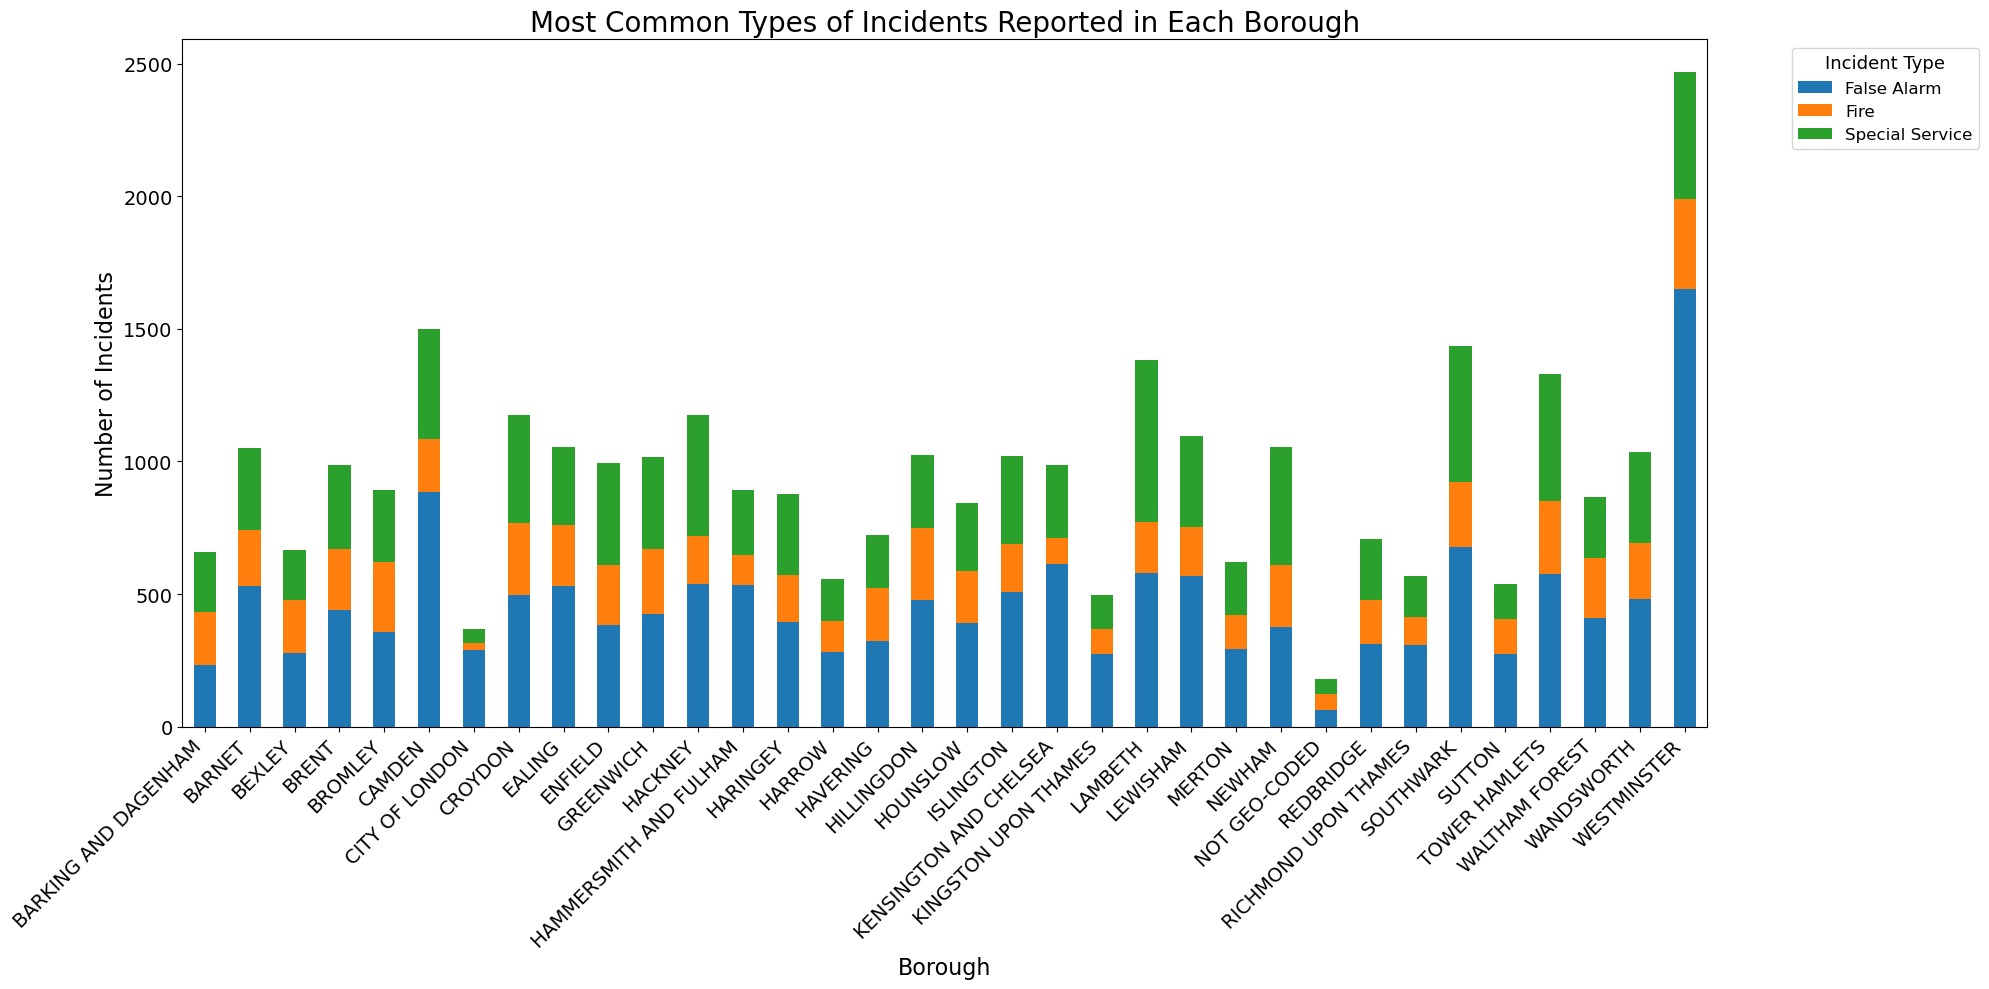

In [15]:
# Plotting using a stacked bar chart for a visual representation
ax = incident_counts.plot(kind='bar', stacked=True, figsize=(20, 10))
plt.title('Most Common Types of Incidents Reported in Each Borough', fontsize=20)
plt.xlabel('Borough', fontsize=16)
plt.ylabel('Number of Incidents', fontsize=16)

# Set tick parameters for x and y axes with increased font size
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)

# Customize legend with increased font size
plt.legend(title='Incident Type', title_fontsize='13', fontsize='12', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

## Insight:
#### The chart above visually breaks down the number of each type of incident (False Alarm, Fire, Special Service) by borough. It quickly helps you see which incidents are most frequent in each borough and how they compare with each other. From this analysis, borough authorities can identify the most critical types of incidents to focus on in terms of resource allocation and preventive measures. Furthermore, the relative size of each segment within the bars indicate if a particular type of incident disproportionately affects a specific borough which can guide more focused interventions.

### Question 2: What are the peak times for fire brigade calls during the day?

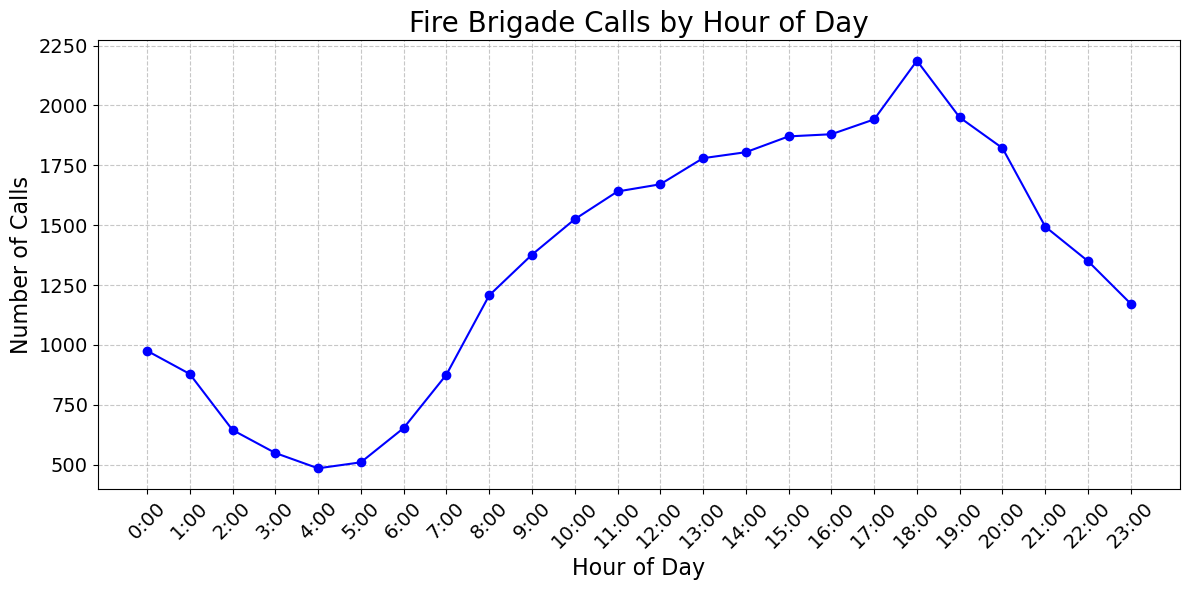

In [17]:
# Convert 'time_of_call' to datetime to extract the hour
data['time_of_call'] = pd.to_datetime(data['time_of_call'], format='%H:%M:%S')
data['hour_of_call'] = data['time_of_call'].dt.hour

# Count the number of calls per hour
calls_per_hour = data.groupby('hour_of_call').size()

# Plotting the data using a line chart
plt.figure(figsize=(12, 6))
plt.plot(calls_per_hour.index, calls_per_hour.values, marker='o', linestyle='-', color='b')
plt.title('Fire Brigade Calls by Hour of Day', fontsize=20)
plt.xlabel('Hour of Day', fontsize=16)
plt.ylabel('Number of Calls', fontsize=16)
plt.xticks(calls_per_hour.index, [f'{i}:00' for i in range(24)], rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Insight:
#### The chart above is depicting the frequency of calls received by the fire brigade at different hours of the day, clearly indicating peak times. A higher peak in certain hours will show when the brigade receives the most calls, helping in scheduling their staff and resource allocation to manage these peak periods effectively.

### Question 3: Which stations have the highest number of calls?

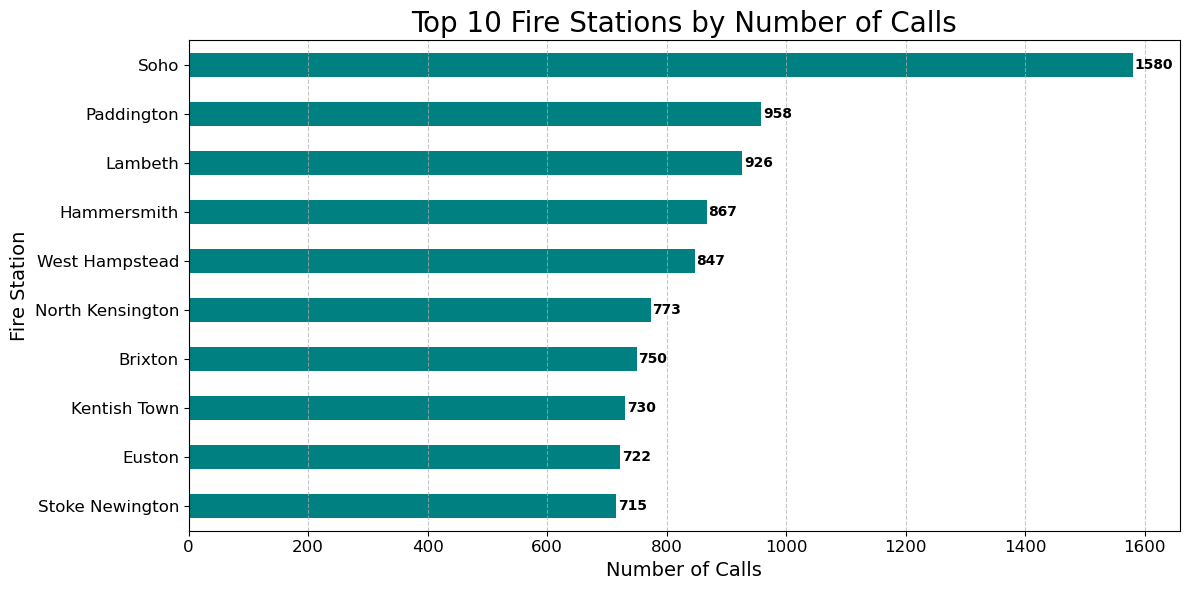

In [25]:
# Combining the counts from the first and second pump arriving stations
data['combined_station'] = data['first_pump_arriving_deployed_from_station'].fillna('') + ',' + data['second_pump_arriving_deployed_from_station'].fillna('')

# Splitting the combined stations and exploding them into separate rows to count each station's appearances correctly
all_stations = data['combined_station'].str.split(',').explode()
calls_per_station = all_stations.value_counts().sort_values(ascending=True)
calls_per_station = calls_per_station[calls_per_station.index != '']

# Plotting the top 10 stations with the most calls in a horizontal bar chart, now sorted from highest to lowest
plt.figure(figsize=(12, 6))
ax = calls_per_station.tail(10).plot(kind='barh', color='teal')
plt.title('Top 10 Fire Stations by Number of Calls', fontsize=20)
plt.ylabel('Fire Station', fontsize=14)  # Reduced font size for y-axis label
plt.xlabel('Number of Calls', fontsize=14)  # Reduced font size for x-axis label
plt.yticks(fontsize=12)  # Reduced font size for y-axis ticks
plt.xticks(fontsize=12)  # Reduced font size for x-axis ticks
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adding data labels to each bar
for i, v in enumerate(calls_per_station.tail(10)):
    ax.text(v + 3, i, str(v), color='black', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

## Insight:
#### This bar chart above highlights the top 10 fire stations based on the number of calls they responded to. Stations with higher bars on the chart receive more calls, indicating higher demand for their services or they might be nearer to areas that are more frequently calling for emergency. Such insights can help in resource allocation and staffing decisions to ensure timely responses in areas with higher call volumes.

### Question 4: What are the common property types involved in incidents?

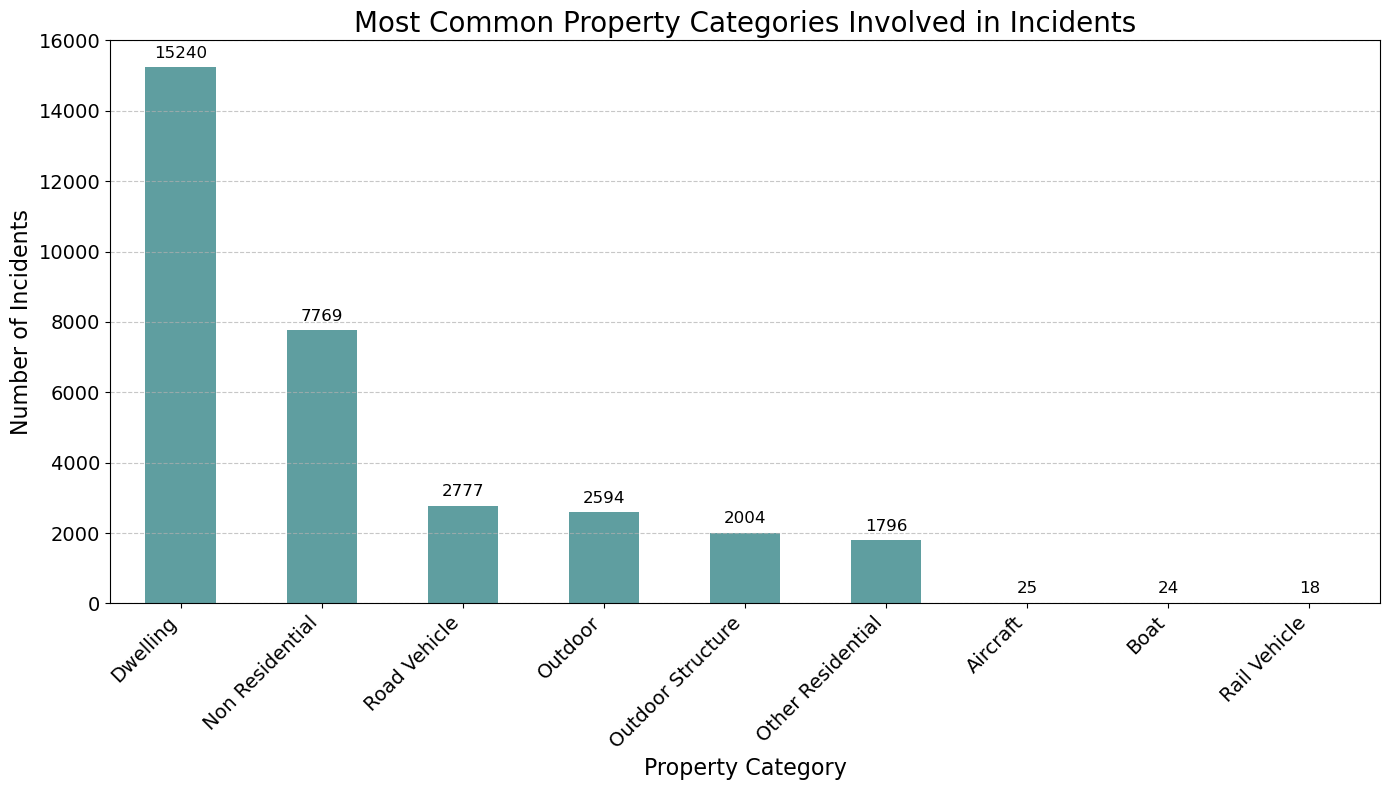

In [29]:
# Counting the number of incidents per property category
property_category_counts = data['property_category'].value_counts().sort_values(ascending=False)

# Plotting the top 15 most common property categories involved in incidents
plt.figure(figsize=(14, 8))
ax = property_category_counts.head(15).plot(kind='bar', color='cadetblue')
plt.title('Most Common Property Categories Involved in Incidents', fontsize=20)
plt.xlabel('Property Category', fontsize=16)
plt.ylabel('Number of Incidents', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding data labels for each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points', fontsize=12)

plt.tight_layout()
plt.show()

## Insight:
#### The bar chart above shows the most common property types involved in incidents. The chart helps to identify which types of properties are most frequently affected by incidents, which is crucial for tailoring prevention and response strategies. Properties that appear more frequently on the chart could be targeted for specific safety campaigns or regulatory attention.

### Question 5: Are there seasonal trends in the types of incidents reported?

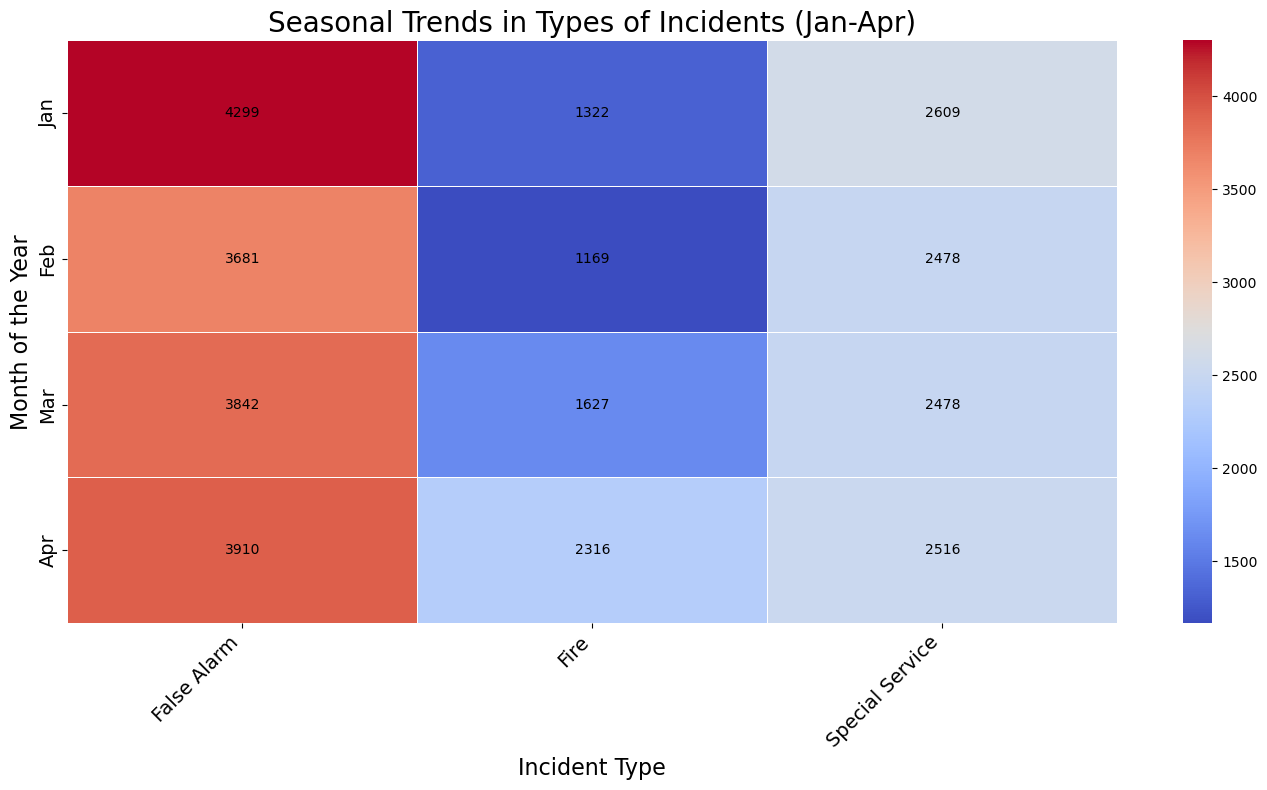

In [51]:
# Convert 'date_of_call' to datetime and extract the month
data['date_of_call'] = pd.to_datetime(data['date_of_call'])
data['month_of_call'] = data['date_of_call'].dt.month

# Filter the data to include only the first four months
data_filtered = data[data['month_of_call'] <= 4]

# Grouping data by month and incident type, then counting occurrences
seasonal_trends = data_filtered.groupby(['month_of_call', 'incident_group']).size().unstack(fill_value=0)

# Ensure there's a row for every month from January to April, even if no incidents occurred
all_months = np.arange(1, 5)
seasonal_trends = seasonal_trends.reindex(all_months, fill_value=0)

# Plotting the data with a heatmap
plt.figure(figsize=(14, 8))
ax = sns.heatmap(seasonal_trends, cmap='coolwarm', fmt='d', linewidths=.5)
plt.title('Seasonal Trends in Types of Incidents (Jan-Apr)', fontsize=20)
plt.xlabel('Incident Type', fontsize=16)
plt.ylabel('Month of the Year', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(ticks=np.arange(0.5, len(all_months)), labels=['Jan', 'Feb', 'Mar', 'Apr'], fontsize=14)

# Manually annotate each cell with the data
for i, row in enumerate(seasonal_trends.values):
    for j, value in enumerate(row):
        text = f'{int(value)}'
        ax.text(j + 0.5, i + 0.5, text, ha='center', va='center', color='black')

plt.tight_layout()
plt.show()

## Insight:
#### The heatmap will show you how the frequency of different types of incidents varies by month, with reddish colors indicating higher frequencies. This can reveal patterns such as increases in certain types of incidents during specific seasons (like more fire incidents in colder months due to heating use or more water rescues during summer).

### Question 6: How effective is the second pump in reducing incident resolution times?

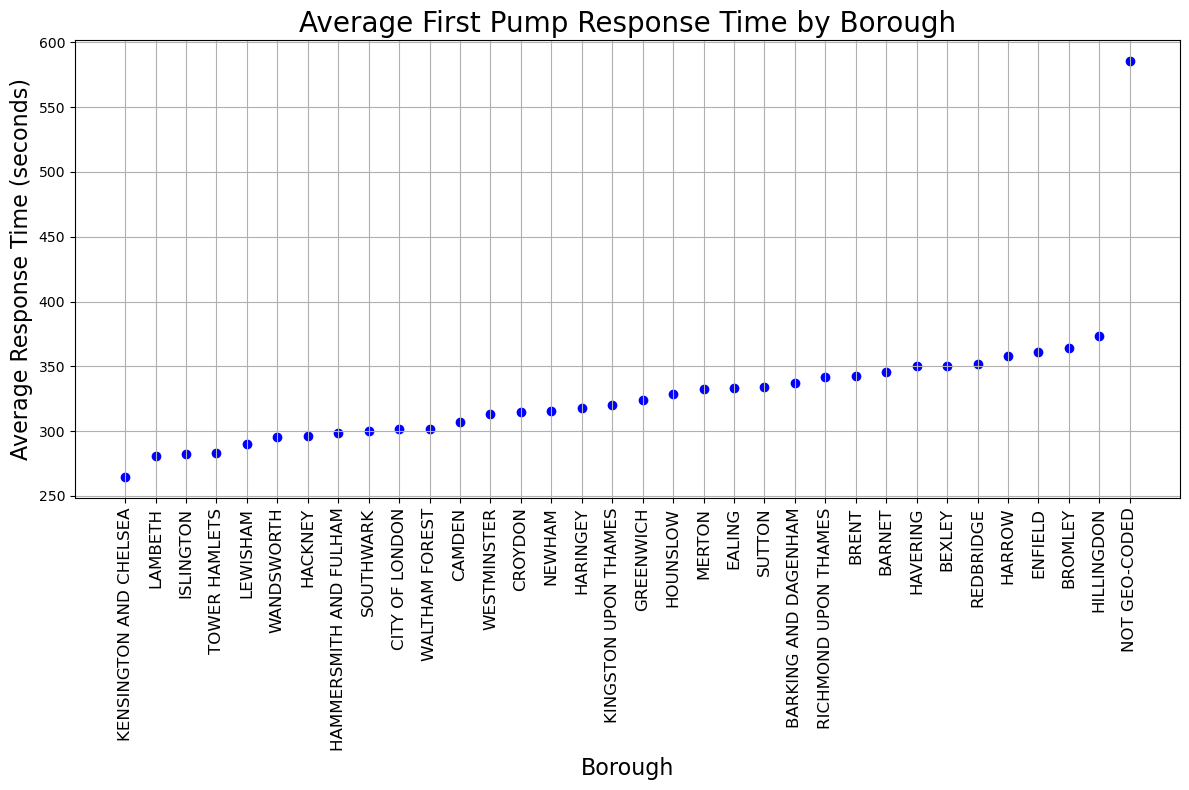

In [53]:
# Ensure 'first_pump_arriving_attendance_time' and 'borough_name' columns are correctly named and data is appropriately formatted
if 'first_pump_arriving_attendance_time' in data.columns and 'borough_name' in data.columns:
    # Convert 'first_pump_arriving_attendance_time' to numeric, ignoring non-numeric values
    data['first_pump_arriving_attendance_time'] = pd.to_numeric(data['first_pump_arriving_attendance_time'], errors='coerce')

    # Drop rows where attendance time or borough name is NaN
    filtered_data = data.dropna(subset=['first_pump_arriving_attendance_time', 'borough_name'])

    # Grouping data by borough and calculating the average first pump arrival time
    borough_response_times = filtered_data.groupby('borough_name')['first_pump_arriving_attendance_time'].mean().reset_index()

    # Sorting the data by average response time for better visualization
    borough_response_times_sorted = borough_response_times.sort_values(by='first_pump_arriving_attendance_time')

    # Plotting the data
    plt.figure(figsize=(12, 8))
    plt.scatter(borough_response_times_sorted['borough_name'], borough_response_times_sorted['first_pump_arriving_attendance_time'], color='blue')
    plt.title('Average First Pump Response Time by Borough', fontsize=20)
    plt.xlabel('Borough', fontsize=16)
    plt.ylabel('Average Response Time (seconds)', fontsize=16)
    plt.xticks(rotation=90, fontsize=12)  # Rotate the borough names for better readability
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("Check your dataset, required columns are missing or misnamed.")

## Insight:
#### The scatter plot shows a range of average response times across boroughs, highlighting differences in how quickly emergency services can respond in different areas. Boroughs with longer average response times may require further investigation to understand the underlying causes. This could lead to initiatives aimed at improving road infrastructure, optimizing the placement of fire stations, or increasing the number of available emergency vehicles and personnel in those areas. The above chart can help in making informed decisions about where additional resources might be needed. For boroughs with consistently high response times, there might be a need to allocate more resources or introduce new strategies for reducing response times.

### Question 7: What types of special services are most commonly required?

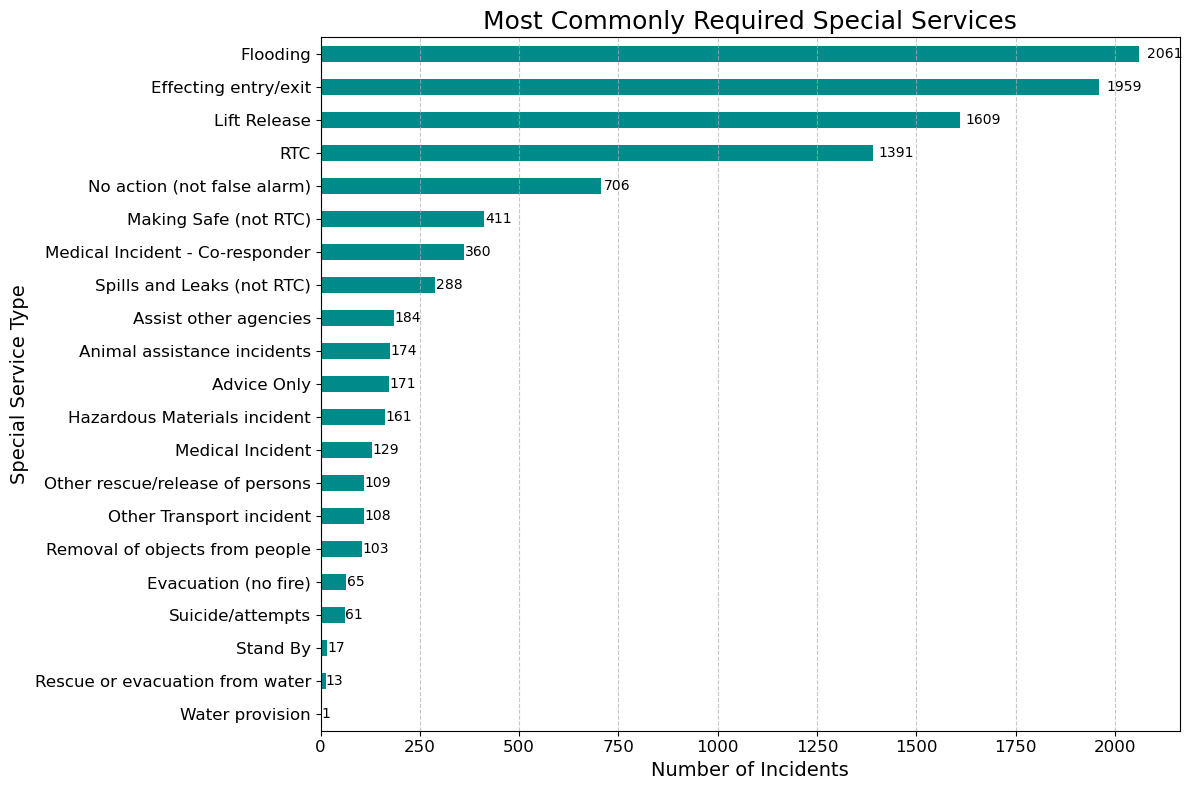

In [59]:
# Check if the 'special_service_type' column exists in the dataset
if 'special_service_type' in data.columns:
    # Counting the number of incidents for each special service type
    special_service_counts = data['special_service_type'].value_counts()

    # Sort the counts in descending order to plot from highest to lowest
    special_service_counts_sorted = special_service_counts.sort_values(ascending=True)

    # Plotting the data as a horizontal bar chart
    plt.figure(figsize=(12, 8))
    ax = special_service_counts_sorted.plot(kind='barh', color='darkcyan')
    plt.title('Most Commonly Required Special Services', fontsize=18)
    plt.ylabel('Special Service Type', fontsize=14)
    plt.xlabel('Number of Incidents', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Adding data labels to each bar
    for p in ax.patches:
        ax.annotate(f'{int(p.get_width())}', 
                    (p.get_width() * 1.01, p.get_y() + p.get_height() / 2),
                    ha='left', va='center', fontsize=10, color='black')  # Smaller font size for data labels

    plt.grid(True, axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("Column 'special_service_type' does not exist in the dataset. Please check the column names and try again.")

## Insight:
#### The analysis of the most commonly required special services reveals insights into the operational demands faced by emergency services. The data shows which special services are most frequently called upon, reflecting the community's specific needs and potentially highlighting areas where more resources or training may be required. For instance, if lift rescues or hazardous material incidents are frequent, this could indicate a need for specialized equipment or training enhancements. Understanding these patterns helps allocate resources more effectively and prepare emergency service workers for the types of challenges they are most likely to encounter in their specific locales.

### Question 8: What are the outcomes of incidents?

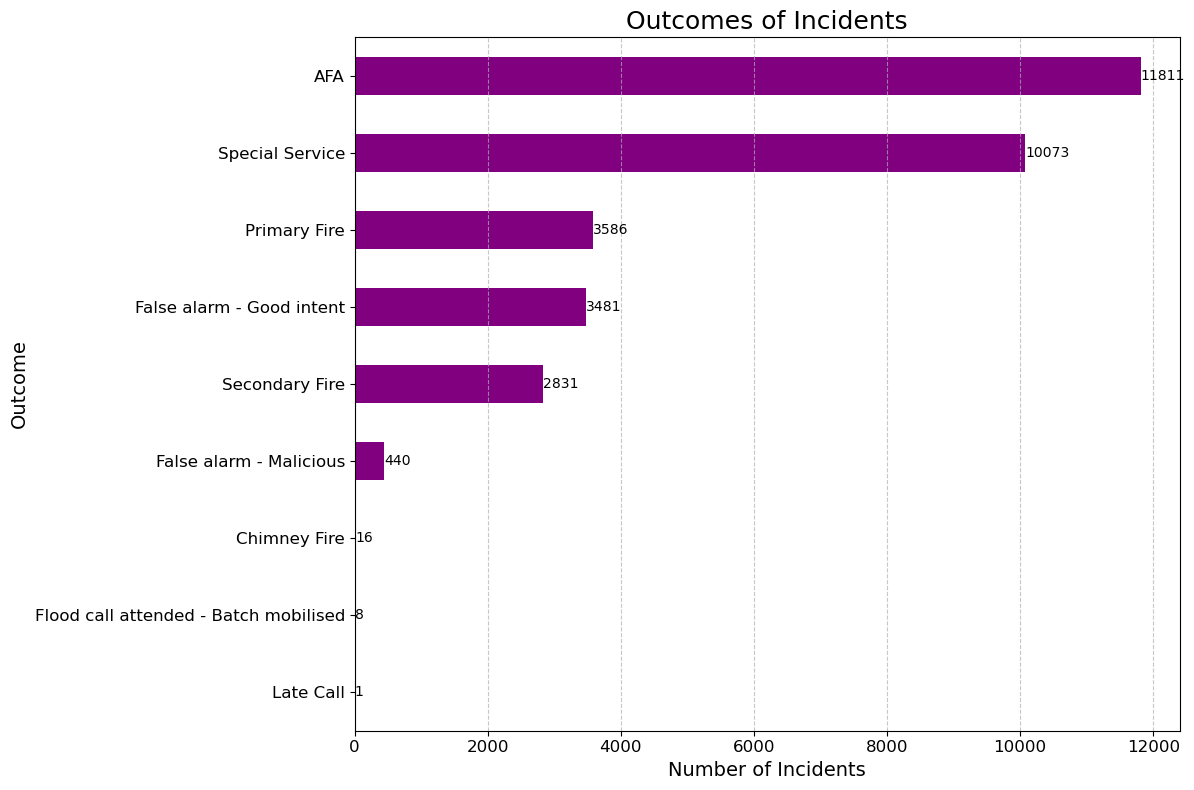

In [68]:
# Check if the 'stop_code_description' column exists in the dataset
if 'stop_code_description' in data.columns:
    # Counting the number of incidents for each outcome
    outcome_counts = data['stop_code_description'].value_counts()

    # Sort the counts in descending order to plot from highest to lowest
    outcome_counts_sorted = outcome_counts.sort_values(ascending=True)

    # Plotting the data as a horizontal bar chart
    plt.figure(figsize=(12, 8))
    ax = outcome_counts_sorted.plot(kind='barh', color='purple')
    plt.title('Outcomes of Incidents', fontsize=18)
    plt.xlabel('Number of Incidents', fontsize=14)
    plt.ylabel('Outcome', fontsize=14)
    plt.xticks(fontsize=12)  # Smaller font size for readability
    plt.yticks(fontsize=12)  # Smaller font size for readability

    # Adding data labels to each bar
    for p in ax.patches:
        ax.annotate(f'{int(p.get_width())}', 
                    (p.get_width(), p.get_y() + p.get_height() / 2),
                    ha='left', va='center', fontsize=10, color='black')

    plt.grid(True, axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("Column 'stop_code_description' does not exist in the dataset. Please check the column names and try again.")

## Insight:
#### The bar chart visualizing the outcomes of incidents highlights the most common resolutions and identifying less frequent but severe outcomes. This visualization enables efficient resource allocation, pinpointing areas where additional training or policy adjustments may be necessary. For instance, frequent occurrences of "False Alarms" may suggest the need for improved alarm systems or public awareness campaigns, while serious outcomes like "Casualties at Scene" indicate areas requiring enhanced response strategies. Overall, this analysis supports efforts to optimize emergency responsesto handle both common and critical scenarios effectively.

### Question 9: What is the Correlation Between Property Type and Incident Type?

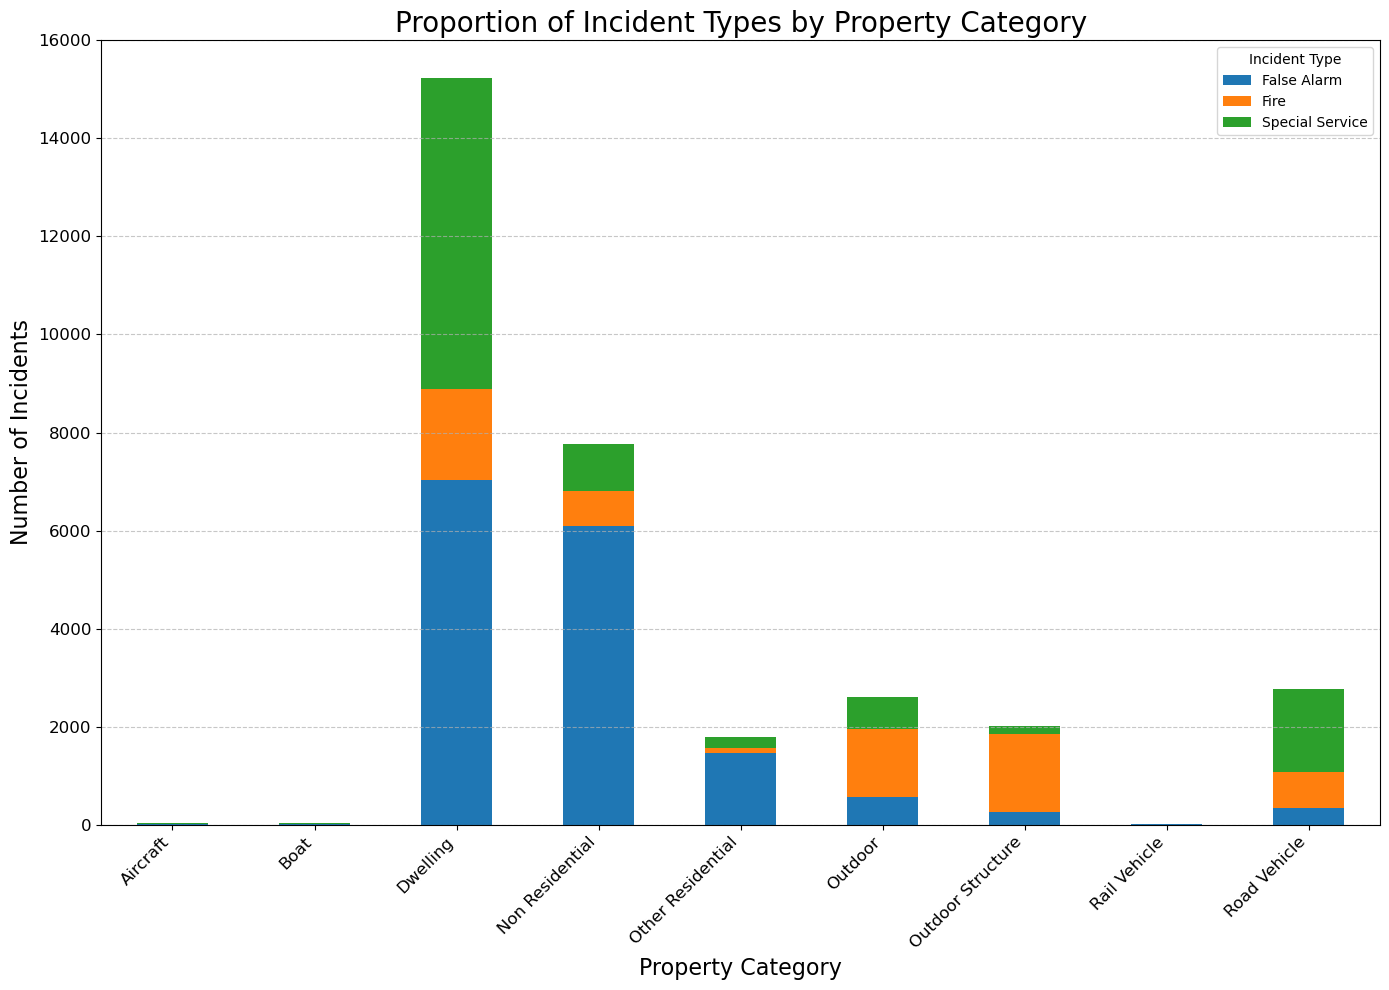

In [74]:
if 'property_category' in data.columns and 'incident_group' in data.columns:
    # Create a crosstab to count occurrences of each combination of property type and incident type
    property_incident_crosstab = pd.crosstab(data['property_category'], data['incident_group'])

    # Plotting the stacked bar chart
    property_incident_crosstab.plot(kind='bar', stacked=True, figsize=(14, 10))
    plt.title('Proportion of Incident Types by Property Category', fontsize=20)
    plt.xlabel('Property Category', fontsize=16)
    plt.ylabel('Number of Incidents', fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(title='Incident Type', bbox_to_anchor=(1.0, 1.0))
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("One or both required columns ('property_category', 'incident_group') do not exist in the dataset. Please check the column names and try again.")

## Insight:
#### The visualization provides a detailed visualization of how incident types are distributed across various property types, highlighting specific risks associated with different environments. This analysis is imperative in tailoring emergency response strategies, ensuring that resources are directed where they are most needed. For example, if certain property types consistently show higher occurrences of specific incidents, emergency services can prioritize training and resources to manage these risks more effectively.